# Комп'ютерне моделювання задач прикладної математики

## Динамічні системи. 

###  Лабораторна робота 4 Реакційно-дифузійні системи та їх застосування

***Студентка Пороскун Олена. Група ПМ.м-21***

Варіант 8

*Task 2 Фазове розшарування бінарних систем.* 

**Постановка задачi**

*Дано*

* Нехай існує два типи речовин А та В.
* Резервуар розміром L x L заповнюють речовинами А та В з концентраціями сА та сВ однорідно.

*Задача*

* Необхідно провести числове моделювання динаміки фазового розшарування однорідного розчину А-В на фази, збагачені на речовину А та речовину В.

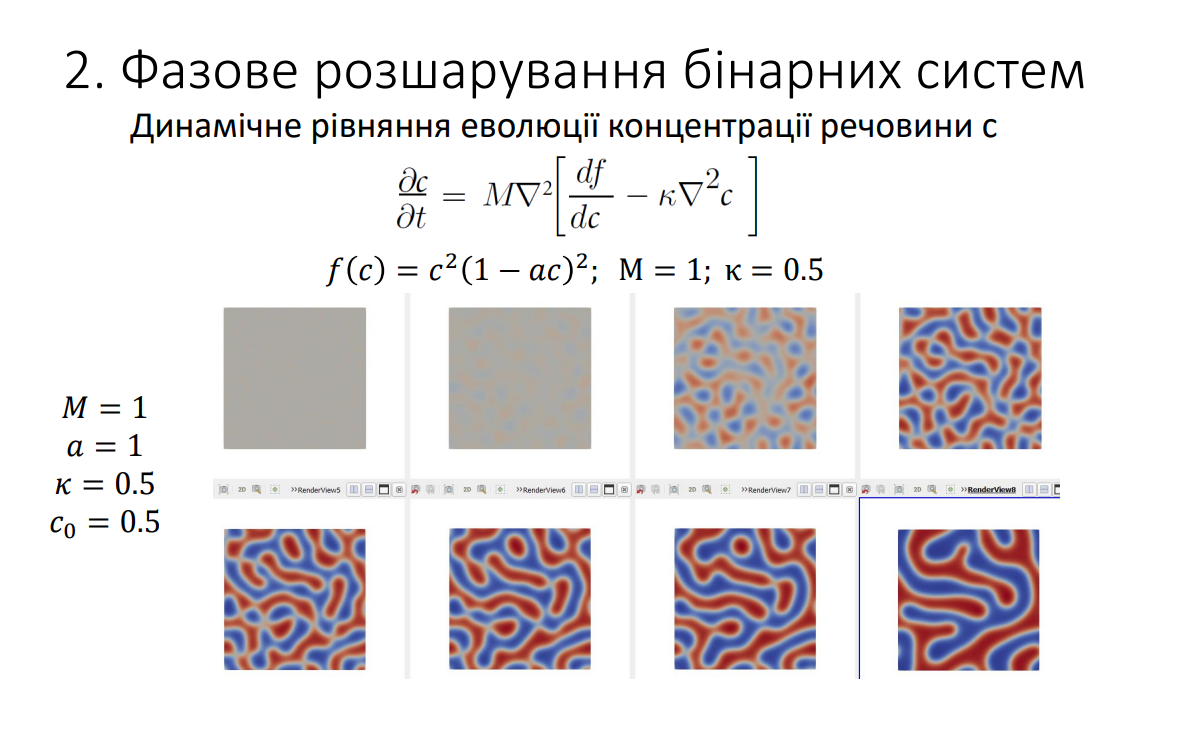

**Умова**

$
M = 1    \\
a = 1    \\ 
k = 0.5  \\ 
c0 = 0.5 \\
$

**Р-ня**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

In [2]:
!pip install sympy

In [3]:
from sympy import diff, symbols

In [4]:
a, c = symbols('a c')
f = (c**2)*((1-a*c)**2)
print('Функція f(c,a):')
f

Функція f(c,a):


c**2*(-a*c + 1)**2

Константи

In [5]:
L = 20 #L = 50
M = 1
k = 0.5
c0 = 0.5
a = 1
print('L =',L,' M =', M,'\t k =',k,'\t c0 =',c0,'\t a =', a)

L = 20  M = 1 	 k = 0.5 	 c0 = 0.5 	 a = 1


In [6]:
c = symbols('c')
f = (c**2)*((1-a*c)**2)
df1_symbol = diff(f, c) # 1 похідна
print("Перша похідна від f(c,a=" f'{a}' ") по с -> df1(c,a):")
df1_symbol

Перша похідна від f(c,a=1) по с -> df1(c,a):


c**2*(2*c - 2) + 2*c*(1 - c)**2

In [7]:
print("Друга похідна від f(c,a) по с -> df2(c,a=" f'{a}' ") (оператор Лапласа):" )
op_laplas_symbol = diff(f, c, 2) # 2 похідна = оператор Лапласа
op_laplas_symbol

Друга похідна від f(c,a) по с -> df2(c,a=1) (оператор Лапласа):


2*(c**2 + 4*c*(c - 1) + (c - 1)**2)

Функція ініціалізації даних початкової концентрації значеннями близькими до $с_0$.

In [8]:
def fun_init_data(L, c0):
    print('Резервуар розміром LxL, де L =', L)
    print('Початкова концентрація близька до значення c0 =', c0)
    
    data = np.linspace(c0-0.05, c0+0.05, L*L)
    len_data = len(data)
    new_size = int(np.sqrt(len_data))
    data_resize = np.resize(data, (new_size, new_size))
    '''
    С_starts = np.zeros((L, L))
    for i in range(L):
        for j in range(L):
            С_starts[i,j] = c0
    return С_starts
    '''
    return data_resize

Побудова графіку двумірних даних концентрації.

In [9]:
def plot_map(data):
    # графік з вертикальною (за замовчуванням) панеллю кольорів
    fig, ax = plt.subplots()
    cax = ax.imshow(data, interpolation='nearest', cmap=cm.coolwarm)
    ax.set_title('Карта концентрації речовини ')
    cbar = fig.colorbar(cax)
    plt.show()

Отже, ініціалізуємо початкові дані та зобразимо їх.

Резервуар розміром LxL, де L = 20
Початкова концентрація близька до значення c0 = 0.5


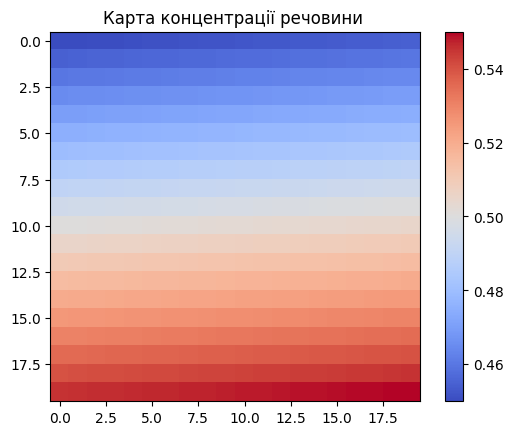

In [10]:
c_init_2D = fun_init_data(L, c0)
plot_map(c_init_2D)

In [11]:
from scipy.integrate import odeint

Функція, що змінює розмірність даних (робить двумірні дані з одномірних даних, наприклад був масив 100х1 стане 10х10):

In [12]:
def plot_resize_data(data):
    len_data = len(data)
    new_size = int(np.sqrt(len_data))
    newdata = np.resize(data, (new_size, new_size))
    plot_map(newdata)
    return newdata

Функція, що повертає останній елемент масиву:

In [13]:
def fun_last_el(array):
    #print('fun_last_el')
    end = len(array)
    return array[end-1]

Функція, що здійснює інтегрування з використанням початкової точки $state0$ за формулою:
$$
\frac{dc}{dt} = M \nabla^2 [ \frac{df}{dc}-k \nabla^2 c ] , \\
де\ \nabla^2 - оператор\ Лапласа\ (друга\ похідна\ від f(c))
$$

In [14]:
def fun_1(state0=0.5):
    # процес інтегрування f(c) = c**2 * (1-a*c) за формулою
    # dc/dt = M*op_laplas*((df/dc) - k*op_laplas*c)
    def dcdt(state, t):
        c = state                                         # Розпаковка вектору
        return M*op_laplas(c)*(df1(c) - k*op_laplas(c)*c) # Похідні
    
    def df1(c):
        #df1 = df/dc 
        return c**2*(2*c-2) + 2*c*(1-c)**2 
        
    def op_laplas(c):
        #df1 = df/dc
        #op_laplas = d(df1)/dc - оператор Лапласа
        return 2*c**2 - 8*c*(1-c) + 2*(1-c)**2 
    
    t = np.arange(0.0, 40.0, 0.1)
    states = odeint(dcdt, state0, t)  
    states = np.round(states, 4)
    
    last_states = fun_last_el(states)
    
    #print('Процес інтегрування')
    #print('Останній елемент масиву =', last_states)
    #print('Розмір масиву =', np.shape(states))
    #print('Перші 10 елементів масиву: \n', states[:10])
    
    return last_states

Text(0, 0.5, 'c')

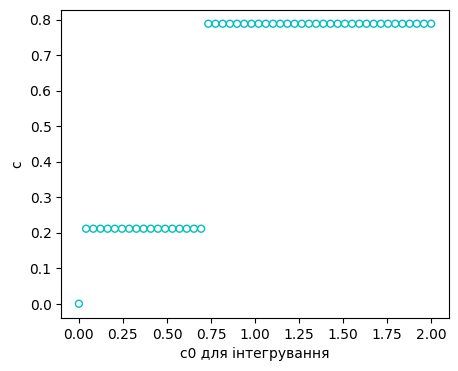

In [15]:
#Результат інтегрування в залежності від початкової точки 
x1 = np.linspace(0, 2, 50)
y1 = [ fun_1(state0=i) for i in x1 ]

plt.figure(figsize =(5,4))
plt.scatter(x1, y1, s=25, marker ='o', c='none', edgecolors ='c')
plt.xlabel('с0 для інтегрування')
plt.ylabel('c')

In [16]:
# початкова концентрація
c_init_1D = np.resize(c_init_2D, L*L)
# після інтегрування в околі точки (с0 = 0.5)
c_1D = [ fun_1(state0=c0i) for c0i in c_init_1D ]

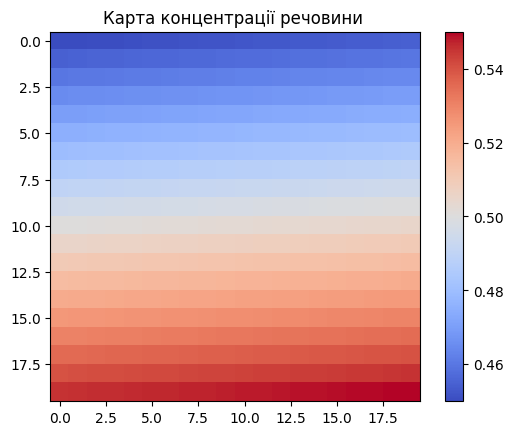

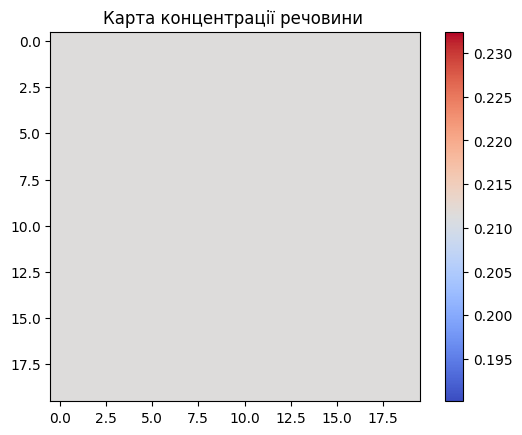

In [17]:
# початкова концентрація
c_init_2D = plot_resize_data(c_init_1D)
# після інтегрування в околі точки (с0 = 0.5)
c_2D = plot_resize_data(c_1D)

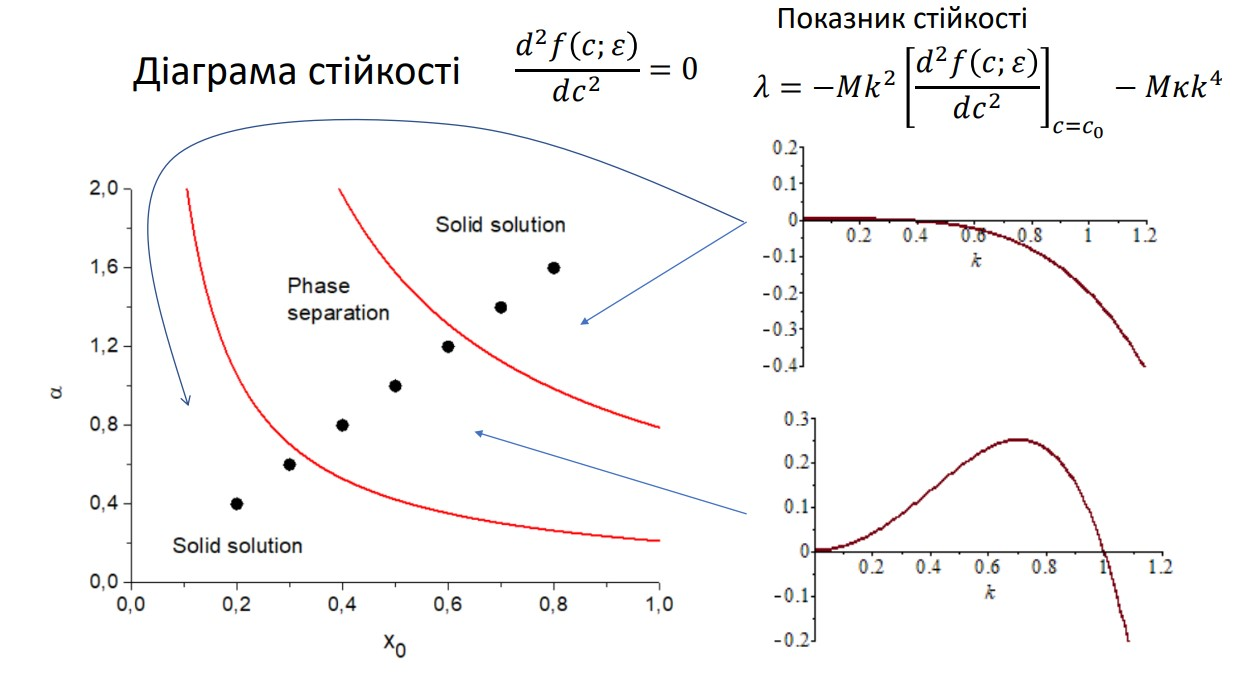

In [18]:
#a, c = symbols('a c')
#f = (c**2)*((1-a*c)**2)
print('Функція f(c, a):')
f

Функція f(c, a):


c**2*(1 - c)**2

In [19]:
a, c = symbols('a c')
f = (c**2)*((1-a*c)**2)
df2_symbol = diff(f, c, 2) # 2 похідна
print('Друга похідна від f(c, a) по с -> df2(c,a):')
df2_symbol

Друга похідна від f(c, a) по с -> df2(c,a):


2*(a**2*c**2 + 4*a*c*(a*c - 1) + (a*c - 1)**2)

In [20]:
def df2(c, a):
    df2_ = 2*(a**2 * c**2 + 4*a*c*(a*c-1) + (a*c-1)**2)  
    # 2 похідна від f(c) = c**2 * (1-a*c) по с (або оператор Лапласа) 
    return df2_  

Функція, що розраховує показник стійкості (lambda):

In [21]:
def stability_indicator(M=1, k=0.5, c0=0.5, a=1, K=[0]):
    print('Розраховуємо показник стійкості (lambda)')
    print(' M =', M, '\t k =', k, '\t c0 =', c0, '\n a =', a, '\n K =', K)
    #arr_lambda = [-M*(Ki**2)*(df2(с0, a)) - M*k*(Ki**4) for Ki in K]
    arr_lambda = [-M*(K[i]**2)*(df2(c0, a[i])) - M*k*(K[i]**4) for i in range(len(K))]
    arr_lambda = np.round(arr_lambda, 5)
    #print('\n lambda: \n', arr_lambda)
    return arr_lambda

Функція, що будує графік показника стійкості $lambda$ в залежності від значення параметрів $a,K$:

In [22]:
def plot_lambda(K, lambda_):
    plt.plot(K, lambda_, label = '$\lambda (K)$')
    plt.hlines(0, min(K), max(K), color='k', linewidth = .7)
    plt.vlines(0, min(lambda_), max(lambda_), color='k', linewidth = .7)
    plt.title('Графік показника стійкості $\lambda (K)$')
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    plt.xlabel('K')
    plt.ylabel('lambda')
    #plt.grid()
    plt.show()

Розраховуємо показник стійкості (lambda)
 M = 1 	 k = 0.5 	 c0 = 0.5 
 a = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 
 K = [0.     0.0517 0.1034 0.1552 0.2069 0.2586 0.3103 0.3621 0.4138 0.4655
 0.5172 0.569  0.6207 0.6724 0.7241 0.7759 0.8276 0.8793 0.931  0.9828
 1.0345 1.0862 1.1379 1.1897 1.2414 1.2931 1.3448 1.3966 1.4483 1.5   ]


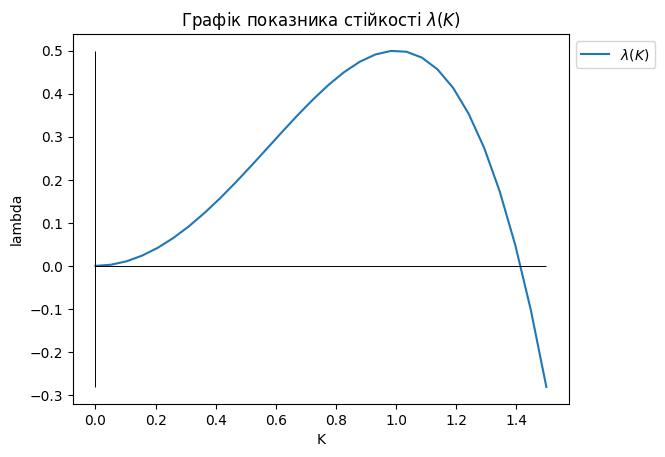

In [23]:
K1 = np.linspace(0, 1.5, 30)
K1 = np.round(K1, 4)
a1 = [1 for i in range(len(K1))]
lambda1 = stability_indicator(M, k, c0, a=a1, K=K1)
plot_lambda(K1, lambda1)

Аналіз стійкості однорідних станів до неоднорідних збурень

Фазова діаграма
$$
a(c_0) = \frac{d^2f(c;a)}{dc^2}|_{c=c_0}
$$

In [24]:
def fun_phase_diaghram(arr_a):
    arr_c0 = np.linspace(0.05, 0.95, 20)
    arr_a_c0 = [df2(arr_c0[i], arr_a[i]) for i in range(len(arr_c0))]
    
    arr_c02  = np.round(arr_c0, 4)
    arr_a    = np.round(arr_a , 4)
    arr_a_c0 = np.round(arr_a_c0 , 4)
    
    print('arr_c0: \n',   arr_c0, '\n')
    print('arr_a: \n',    arr_a, '\n')
    print('arr_a_c0: \n', arr_a_c0)
    
    plt.plot(arr_c0, arr_a_c0)
    plt.xlabel('c0')
    plt.ylabel('a')
    plt.title('Фазова діаграма a(c0)')
    plt.xlim((0,1))
    return arr_c0, arr_a, arr_a_c0 

arr_c0: 
 [0.05       0.09736842 0.14473684 0.19210526 0.23947368 0.28684211
 0.33421053 0.38157895 0.42894737 0.47631579 0.52368421 0.57105263
 0.61842105 0.66578947 0.71315789 0.76052632 0.80789474 0.85526316
 0.90263158 0.95      ] 

arr_a: 
 [0.05   0.0579 0.0658 0.0737 0.0816 0.0895 0.0974 0.1053 0.1132 0.1211
 0.1289 0.1368 0.1447 0.1526 0.1605 0.1684 0.1763 0.1842 0.1921 0.2   ] 

arr_a_c0: 
 [1.9701 1.9327 1.8868 1.8325 1.7701 1.6999 1.6222 1.5374 1.4458 1.348
 1.2444 1.1355 1.022  0.9045 0.7835 0.6598 0.5342 0.4073 0.28   0.1532]

Розмірність масиву ans_1 = (3, 20)


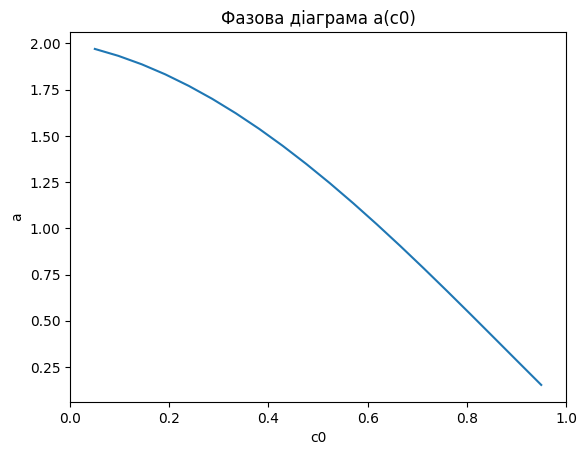

In [25]:
a_1 = np.linspace(0.05, 0.20, 20)
ans_1 = fun_phase_diaghram(a_1)
print('\nРозмірність масиву ans_1 =', np.shape(ans_1)) #(3, 20)

arr_c0: 
 [0.05       0.09736842 0.14473684 0.19210526 0.23947368 0.28684211
 0.33421053 0.38157895 0.42894737 0.47631579 0.52368421 0.57105263
 0.61842105 0.66578947 0.71315789 0.76052632 0.80789474 0.85526316
 0.90263158 0.95      ] 

arr_a: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 

arr_a_c0: 
 [ 1.43    0.9453  0.5145  0.1376 -0.1855 -0.4548 -0.6702 -0.8317 -0.9394
 -0.9933 -0.9933 -0.9394 -0.8317 -0.6702 -0.4548 -0.1855  0.1376  0.5145
  0.9453  1.43  ]

Розмірність масиву ans_2 = (3, 20)


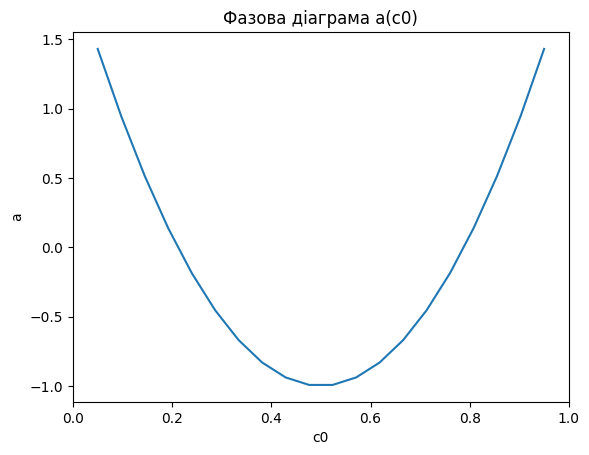

In [26]:
a_2 = [1 for i in range(20)]
ans_2 = fun_phase_diaghram(a_2)
print('\nРозмірність масиву ans_2 =', np.shape(ans_2)) #(3, 20)